In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
df = pd.read_csv('/content/drive/MyDrive/SEMESTER 4/Big Data Analytics/uas/Coffee Shop Sales.csv', sep=';')
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,01/01/2023,07:06:11,2,5,Lower Manhattan,32,3,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,01/01/2023,07:08:56,2,5,Lower Manhattan,57,"3,1",Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,01/01/2023,07:14:04,2,5,Lower Manhattan,59,"4,5",Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,01/01/2023,07:20:24,1,5,Lower Manhattan,22,2,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,01/01/2023,07:22:41,2,5,Lower Manhattan,57,"3,1",Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,30/06/2023,20:18:41,2,8,Hell's Kitchen,44,"2,5",Tea,Brewed herbal tea,Peppermint Rg
149112,149453,30/06/2023,20:25:10,2,8,Hell's Kitchen,49,3,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,30/06/2023,20:31:34,1,8,Hell's Kitchen,45,3,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,30/06/2023,20:57:19,1,8,Hell's Kitchen,40,"3,75",Coffee,Barista Espresso,Cappuccino


**Eksplorasi Data (EDA) dan Visualisasi**

In [25]:
# --- 1. Memuat dan Membersihkan Data ---
print("\nMemuat dan membersihkan data...")
try:
    df = pd.read_csv('/content/drive/MyDrive/Other/Coffee Shop Sales.csv', sep=';')

    # Mengubah 'unit_price' ke tipe float
    if df['unit_price'].dtype == 'object':
        df['unit_price'] = df['unit_price'].str.replace(',', '.').astype(float)

    # Membuat kolom 'total_price'
    df['total_price'] = df['transaction_qty'] * df['unit_price']

    # Mengubah kolom tanggal dan waktu
    df['transaction_date'] = pd.to_datetime(df['transaction_date'], dayfirst=True)
    df['hour'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.hour

    # Membuat kolom tambahan untuk analisis waktu
    df['month'] = df['transaction_date'].dt.to_period('M').astype(str)
    df['day_of_week'] = df['transaction_date'].dt.day_name()

    print("Data berhasil dimuat dan dibersihkan.")
    print("Jumlah baris:", len(df))
    print("Data siap untuk dianalisis.")

except FileNotFoundError:
    print("ERROR: File 'Coffee Shop Sales.csv' tidak ditemukan. Pastikan file ada di direktori yang sama.")
    exit()


Memuat dan membersihkan data...
Data berhasil dimuat dan dibersihkan.
Jumlah baris: 149116
Data siap untuk dianalisis.


In [26]:
# --- 2. Membuat Visualisasi ---
print("\nMembuat visualisasi data...")

# Mengatur gaya plot global
sns.set(style="whitegrid", palette="viridis")
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.size'] = 12



Membuat visualisasi data...


Semua 5 grafik visualisasi EDA telah disimpan dalam format .png


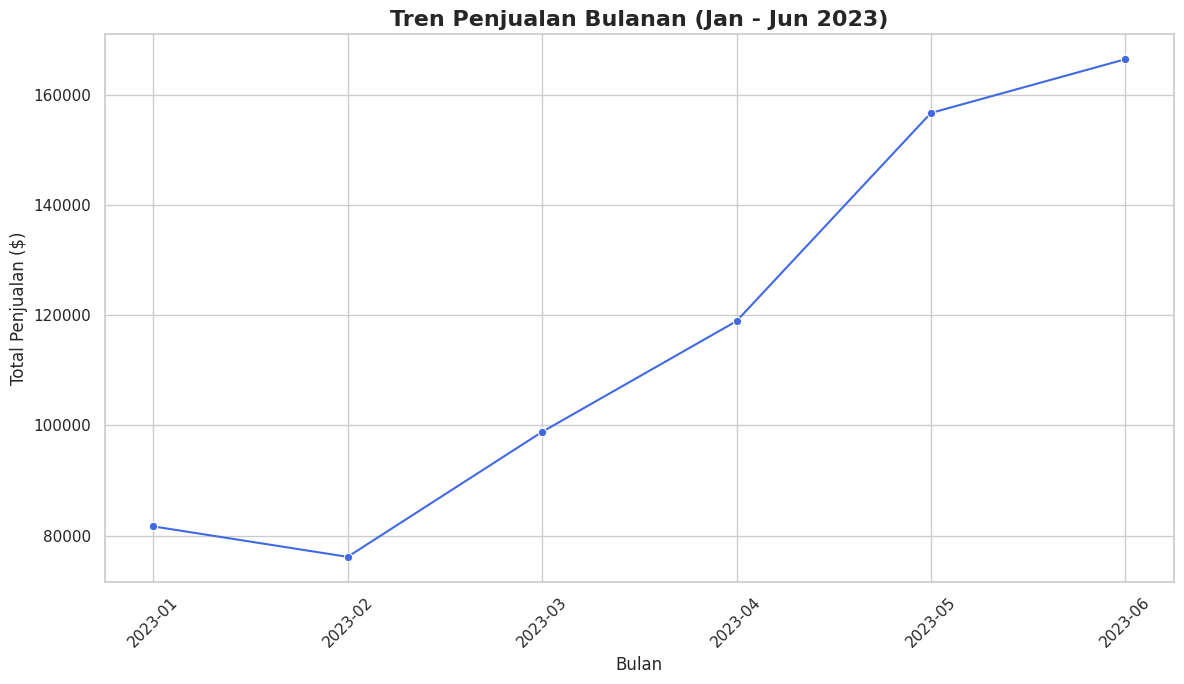

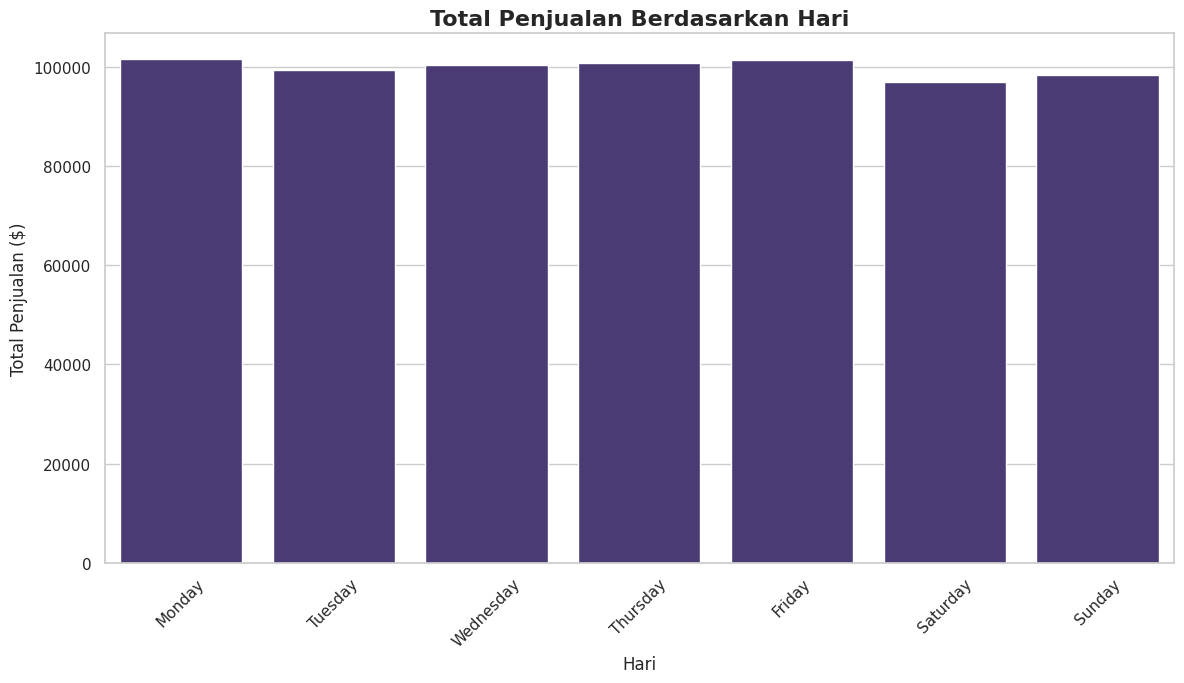

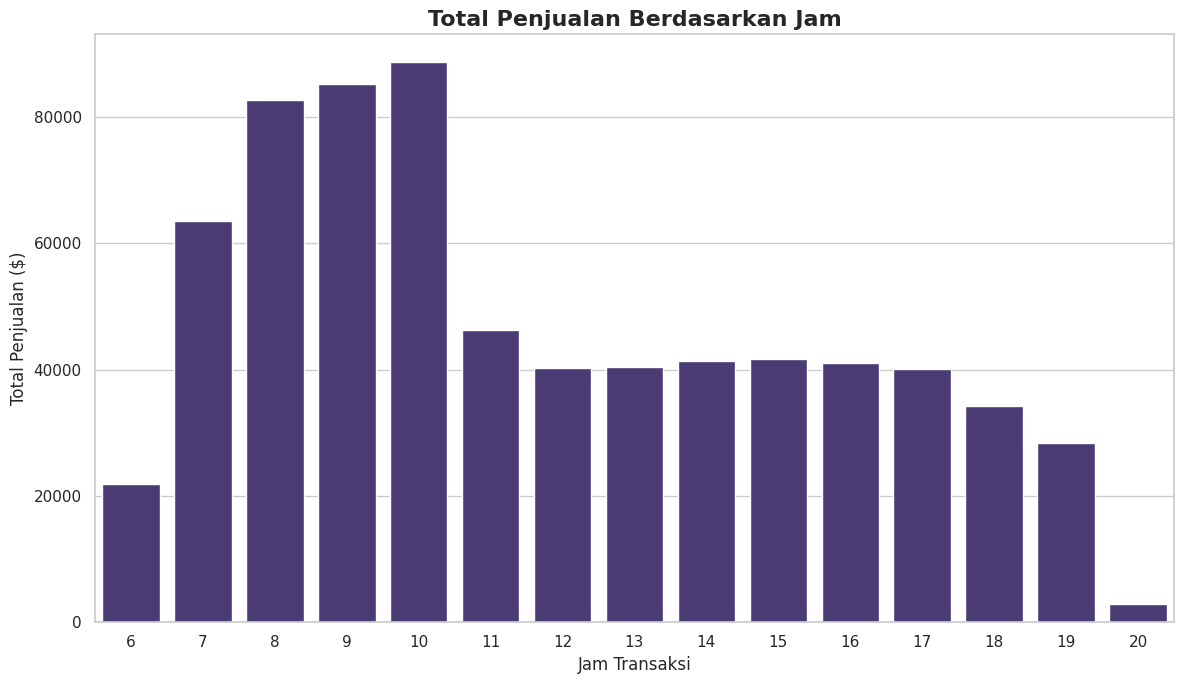

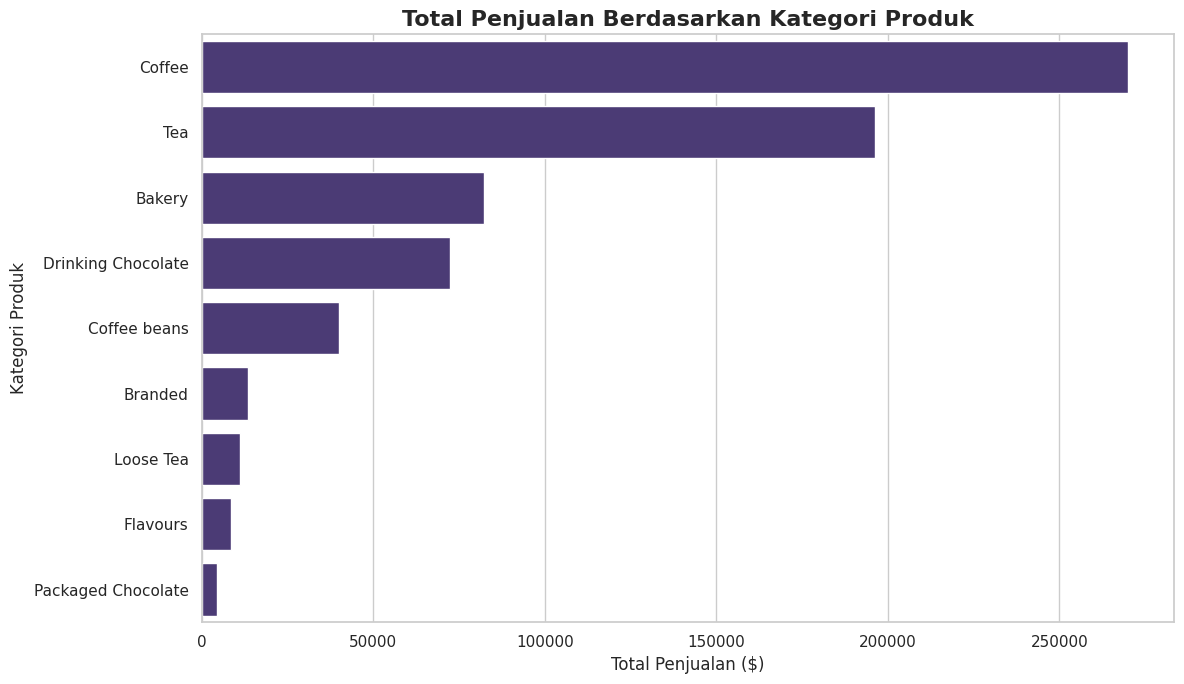

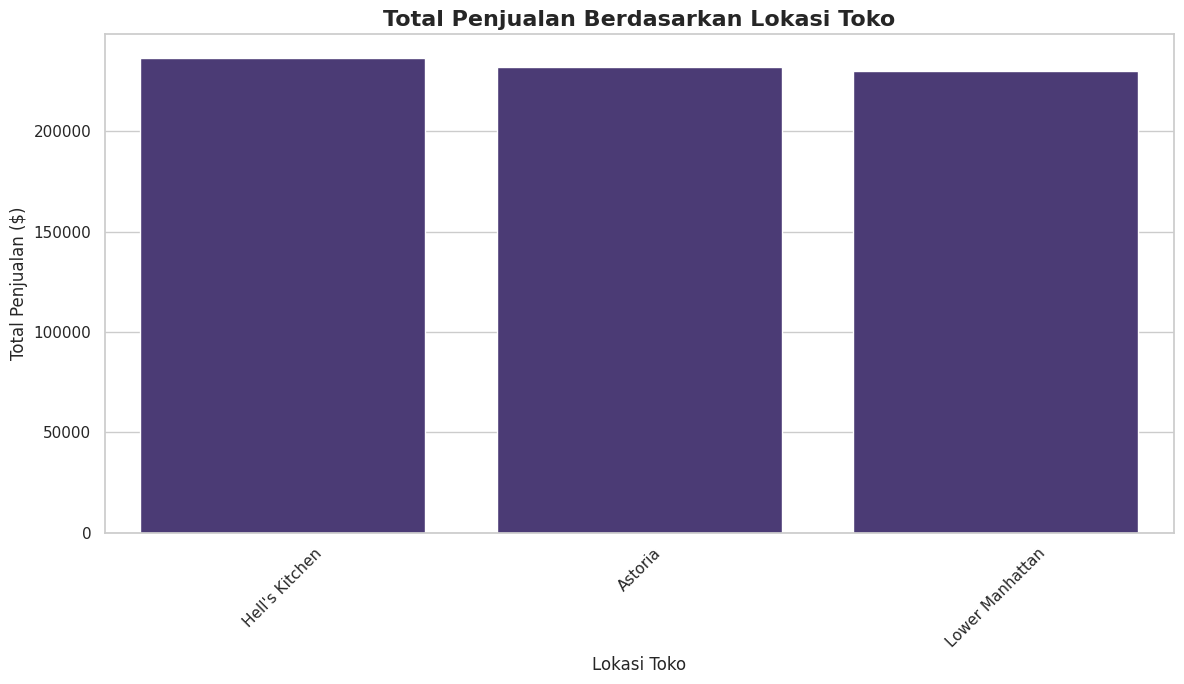

In [27]:
# Visualisasi 1: Tren Penjualan Bulanan
sales_by_month = df.groupby('month')['total_price'].sum().reset_index()
plt.figure()
sns.lineplot(data=sales_by_month, x='month', y='total_price', marker='o', color='royalblue')
plt.title('Tren Penjualan Bulanan (Jan - Jun 2023)', fontsize=16, fontweight='bold')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('sales_trends_by_month.png')

# Visualisasi 2: Penjualan Berdasarkan Hari
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day = df.groupby('day_of_week')['total_price'].sum().reindex(days_order).reset_index()
plt.figure()
sns.barplot(data=sales_by_day, x='day_of_week', y='total_price')
plt.title('Total Penjualan Berdasarkan Hari', fontsize=16, fontweight='bold')
plt.xlabel('Hari')
plt.ylabel('Total Penjualan ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('sales_by_day_of_week.png')

# Visualisasi 3: Penjualan Berdasarkan Jam
sales_by_hour = df.groupby('hour')['total_price'].sum().reset_index()
plt.figure()
sns.barplot(data=sales_by_hour, x='hour', y='total_price')
plt.title('Total Penjualan Berdasarkan Jam', fontsize=16, fontweight='bold')
plt.xlabel('Jam Transaksi')
plt.ylabel('Total Penjualan ($)')
plt.tight_layout()
plt.savefig('sales_by_hour.png')

# Visualisasi 4: Penjualan Berdasarkan Kategori Produk
sales_by_category = df.groupby('product_category')['total_price'].sum().sort_values(ascending=False).reset_index()
plt.figure()
sns.barplot(data=sales_by_category, y='product_category', x='total_price', orient='h')
plt.title('Total Penjualan Berdasarkan Kategori Produk', fontsize=16, fontweight='bold')
plt.xlabel('Total Penjualan ($)')
plt.ylabel('Kategori Produk')
plt.tight_layout()
plt.savefig('sales_by_product_category.png')

# Visualisasi 5: Penjualan Berdasarkan Lokasi Toko
sales_by_location = df.groupby('store_location')['total_price'].sum().sort_values(ascending=False).reset_index()
plt.figure()
sns.barplot(data=sales_by_location, x='store_location', y='total_price')
plt.title('Total Penjualan Berdasarkan Lokasi Toko', fontsize=16, fontweight='bold')
plt.xlabel('Lokasi Toko')
plt.ylabel('Total Penjualan ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('sales_by_store_location.png')

print("Semua 5 grafik visualisasi EDA telah disimpan dalam format .png")

**Analisis Korelasi**



Melakukan analisis korelasi...


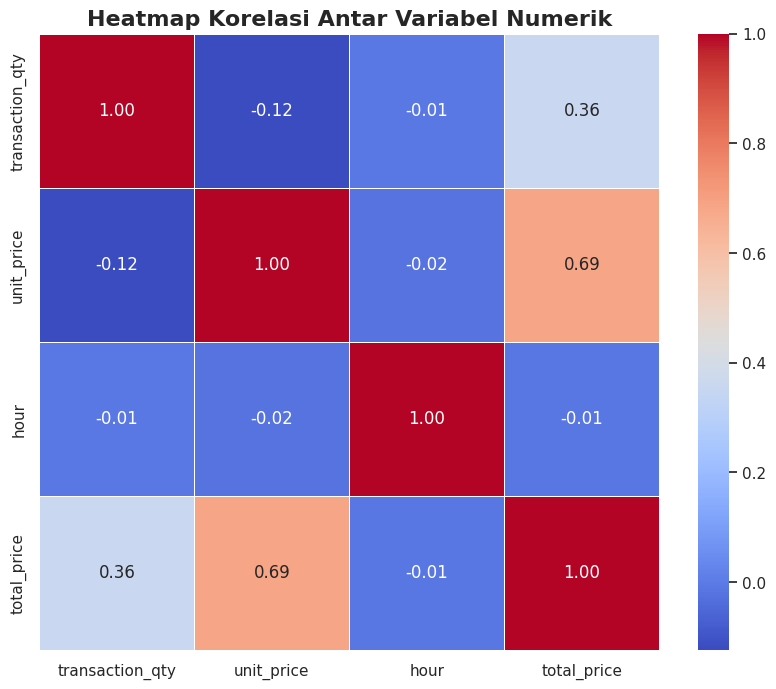

Heatmap korelasi telah disimpan sebagai correlation_heatmap.png


In [28]:
print("\nMelakukan analisis korelasi...")

numerical_cols = ['transaction_qty', 'unit_price', 'hour', 'total_price']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi Antar Variabel Numerik', fontsize=16, fontweight='bold')
plt.savefig('correlation_heatmap.png')
plt.show()

print("Heatmap korelasi telah disimpan sebagai correlation_heatmap.png")

**Membuat Model Regresi Linier**

In [29]:
print("\nMembangun model regresi linier...")

# 1. Tentukan Variabel Target (Y) dan Fitur (X)
X = df[['transaction_qty', 'unit_price']]
y = df['total_price']

# 2. Bagi Data menjadi Data Latih dan Data Uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Buat dan Latih Model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model Regresi Linier berhasil dilatih.")


Membangun model regresi linier...
Model Regresi Linier berhasil dilatih.


**Evaluasi Model Linier**

In [30]:
print("\nMengevaluasi performa model...")

# 4. Buat Prediksi pada Data Uji
y_pred = model.predict(X_test)

# 5. Hitung Metrik Evaluasi
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Tampilkan hasil
print("\n--- Hasil Evaluasi Model ---")
print(f"Persamaan Model: total_price = {model.intercept_:.4f} + ({model.coef_[0]:.4f} * transaction_qty) + ({model.coef_[1]:.4f} * unit_price)")
print("-" * 30)
print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Absolute Error (MAE): ${mae:.4f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.4f}")

print("\n\nAnalisis selesai.")


Mengevaluasi performa model...

--- Hasil Evaluasi Model ---
Persamaan Model: total_price = -4.5934 + (3.6131 * transaction_qty) + (1.2082 * unit_price)
------------------------------
R-squared (R²): 0.9361
Mean Absolute Error (MAE): $0.5115
Root Mean Squared Error (RMSE): $0.7644


Analisis selesai.
